In [1]:
# Import pandas as pd
import pandas as pd
# Use Matplotlib for visualisation
import matplotlib.pyplot as plt
# Import seaborn as sns
import seaborn as sns
# Use Numpy for computation
import numpy as np
# Use Scipy for statistics 
from scipy.stats import skew, kurtosis
# Import shapiro from scipy.stats
from scipy.stats import shapiro

## 1. Univariate Investment Risk and Returns

1. #### Financial Time Series Data

In [2]:

# Read in the csv file and parse dates 
fpath_csv1 = './datasets/MSFTPrices.csv'
StockPrices = pd.read_csv(fpath_csv1, parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


#### Calculating financial returns

In [3]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())


        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


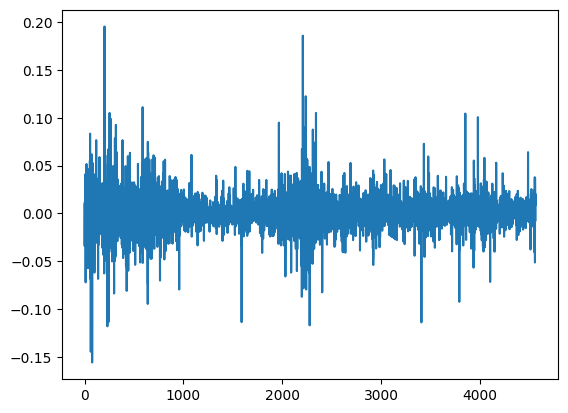

In [4]:
# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()


#### Plot return distribution

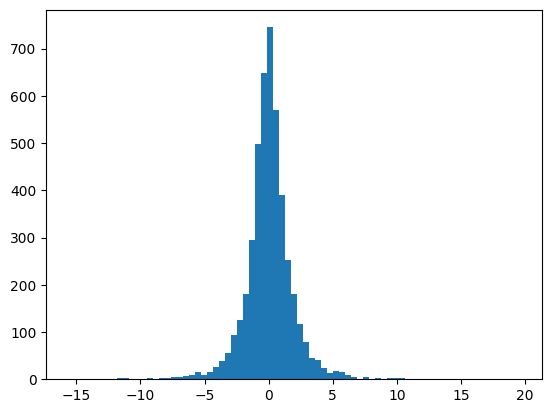

In [5]:
# Plot return distribution
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins = 75)
plt.show()

### Calcualte the AVG daily return and the implied annualised AVG return

In [6]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.00037777546435757676
0.09985839482852632


**Interpretion**: The average daily return of the stock (mu) is 0.04% per day. This works out to an annualized return of 9.99% per year.

In [7]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(f'The average daily volatility of the stock is {sigma_daily}')

# Calculate the daily variance
variance_daily = sigma_daily**2
print(f'The average daily variance of the stock is {variance_daily}')
      
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(f'The average annualised volatility of the stock is {sigma_annualized}')

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(f'The average annualised variance of the stock is {variance_annualized}')


The average daily volatility of the stock is 0.019341100408708317
The average daily variance of the stock is 0.00037407816501973704
The average annualised volatility of the stock is 0.3070304505826315
The average annualised variance of the stock is 0.09426769758497373


#### Knowledge Revision:
- **Standard Deviation`σ`** referred to as **Volatility**: Measures the dispersion of returns
- An investment with higher `σ` is viewed as a higher risk investment
- Volatility scales with thesquare root of time.

#### Interpretion: 
- The average daily volatility of the stock (sigma) is 1.93% per day. The average daily variance of the stock (the second moment) is 0.04%.
- This works out to an annualized volatility (sigma) of 30.7% per year. And an annualized variance of 9.43% per year

In [8]:
# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

0.21935459193067805
10.314572618025519
13.314572618025519


#### Knowledge Revision:
1. **Skewness** 
- **Negative Skew**: The mass of the distribution is concentrated on the right. Usually a right-leaning curve
- **Positive Skew**: The mass ofthe distribution is concentrated on the left. Usually a left-learning curve. 
- The skewness is higher/less than 0,suggesting non-normality
- In finance, you would tend to want **positive skewness**, as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.
2. **Kurtisos** - Indicator of outlier
- **Kurtosis** is a measure of thethickness of the tails of a distribution
- Most financial returns are leptokurtic
- **Leptokurti**c: When a distribution has **positive excess kurtosis** (kurtosis greater than 3)
- Excess Kurtosis: Subtract 3 from the sample kurtosis to calculate "Excess Kurtosis"
- In finance, **high excess kurtosis** is an indication of **high risk**. When large movements in returns happen often, this can be a very bad thing for your portfolio if it moves in the wrong direction. High kurtosis distributions are said to have "thick tails", which means that outliers, such as extreme negative and positive returns, are more common.
#### Interpretion: 
- The third moment (**skewness**) of the stock returns is 0.22. A normal distribution would have a skewness much closer to 0.
- The fourth moment (kurtosis) of the stock returns is 13.31 with an excess kurtosis of 10.31. A normal distribution would tend to have a kurtosis of 3, and an excess kurtosis of 0.

#### Statistic test for Normality
In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

In [9]:
# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
Null hypothesis of normality is rejected.


## 2. Portfolio Investing
Enhance understanding of investing by constructing portfolios of assets to improve risk-adjusted returns.

### Portfolio Composition and Back Testing

In [27]:
fpath_csv2 = './datasets/Big9Returns2017.csv'
StockReturns = pd.read_csv(fpath_csv2, parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockReturns = StockReturns.sort_values(by='Date').set_index('Date')

# Print only the first five rows of StockPrices
print(StockReturns.head())

                AAPL      MSFT       XOM  ...        GE        FB         T
Date                                      ...                              
2017-01-03  0.002849  0.007081  0.006980  ...  0.002848  0.015732  0.011521
2017-01-04 -0.001119 -0.004474 -0.011002  ...  0.000316  0.015660 -0.005811
2017-01-05  0.005085  0.000000 -0.014907  ... -0.005678  0.016682 -0.002806
2017-01-06  0.011148  0.008668 -0.000565  ...  0.002855  0.022707 -0.019924
2017-01-09  0.009159 -0.003183 -0.016497  ... -0.004745  0.012074 -0.012585

[5 rows x 9 columns]


#### Create a function to automate the portfolio return visualisation

In [28]:
# Function to plot the cumulative portfolio returns over time
def cumulative_returns_plot(portfolio_names):
    CumulativeReturns = ((1 + StockReturns).cumprod() - 1)
    return CumulativeReturns[portfolio_names].plot()


#### Calculating portfolio returns

In [29]:
numstocks = 9
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks,numstocks)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)


#### Market-cap weighted portfolios

<AxesSubplot: xlabel='Date'>

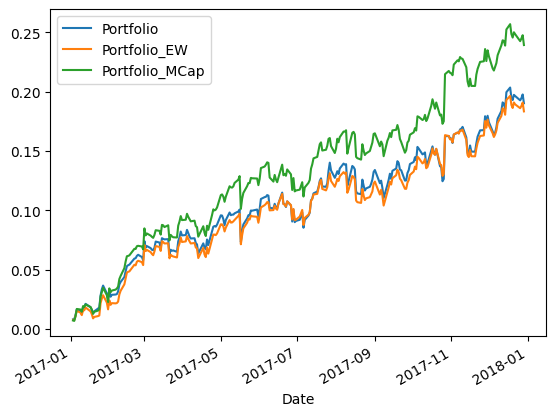

In [30]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations/sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

**Market capitalization**: The value of a company's publicly traded shares
Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

### The variance and covariance 

####  The Correlation Matrix
The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in `.corr()` method on a `pandas` DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In this exercise, you will use the `seaborn` library to generate a heatmap.

In [19]:
# Extract only assets columns without returns
StockReturns = pd.DataFrame(StockReturns.iloc[0:9,0:9])
StockReturns.shape


(9, 9)

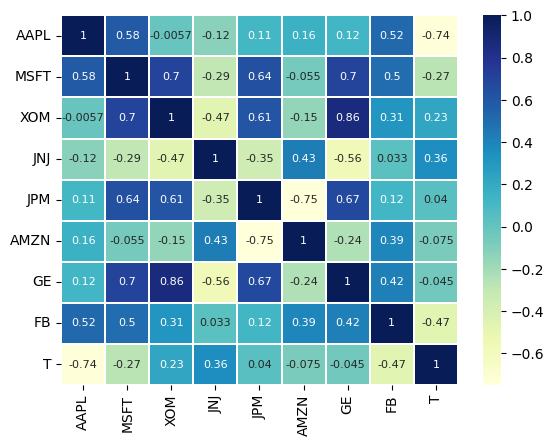

In [32]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.iloc[0:9,0:9].corr()

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

**Intepretion**: Note that Amazon is most correlated with Facebook and Microsoft. The correlation matrix is very useful for a variety of quantitative investment analysis methods.

### The co-variance matrix
You can easily compute the co-variance matrix of a DataFrame of returns using the `.cov()` method.

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

In [33]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[0:9,0:9].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM  ...        GE        FB         T
AAPL  0.006596  0.004696 -0.000071  ...  0.000535  0.005276 -0.009415
MSFT  0.004696  0.009936  0.010643  ...  0.003723  0.006224 -0.004281
XOM  -0.000071  0.010643  0.023566  ...  0.007045  0.006035  0.005466
JNJ  -0.000992 -0.002926 -0.007151  ... -0.003000  0.000408  0.005576
JPM   0.001009  0.006955  0.010242  ...  0.003931  0.001703  0.000682
AMZN  0.002148 -0.000939 -0.003915  ... -0.002165  0.008334 -0.002008
GE    0.000535  0.003723  0.007045  ...  0.002850  0.002800 -0.000379
FB    0.005276  0.006224  0.006035  ...  0.002800  0.015740 -0.009192
T    -0.009415 -0.004281  0.005466  ... -0.000379 -0.009192  0.024549

[9 rows x 9 columns]


In [34]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(f'The portfolio volatility is {portfolio_volatility}')

The portfolio volatility is 0.051578655712995046


### Portfolio standard deviation (POrtfolio volatility)
In order to calculate portfolio volatility, you will need the covariance matrix, the portfolio weights, and knowledge of the transpose operation. The transpose of a numpy array can be calculated using the `.T` attribute. The `np.dot()` function is the dot-product of two arrays.


In [35]:
# Read in the csv file and parse dates 
fpath_csv3 = './datasets/EfficientFrontierPortfoliosSlim.csv'
RandomPortfolios = pd.read_csv(fpath_csv3)

# Print only the first five rows of StockPrices
print(RandomPortfolios.head())


   AAPL weight  MSFT weight  XOM weight  ...  T weight   Returns  Volatility
0     0.000053     0.263110    0.007022  ...  0.010087  0.127453    0.171565
1     0.042360     0.034922    0.079355  ...  0.008590  0.138614    0.182723
2     0.207824     0.002132    0.005982  ...  0.034075  0.155952    0.201185
3     0.096565     0.016775    0.118409  ...  0.000020  0.118787    0.148958
4     0.131309     0.002733    0.002360  ...  0.005141  0.138304    0.171473

[5 rows x 11 columns]


### Markowitz portfolios
The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

In [36]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free)/RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


#### - The MSR portfolio
The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

<AxesSubplot: xlabel='Date'>

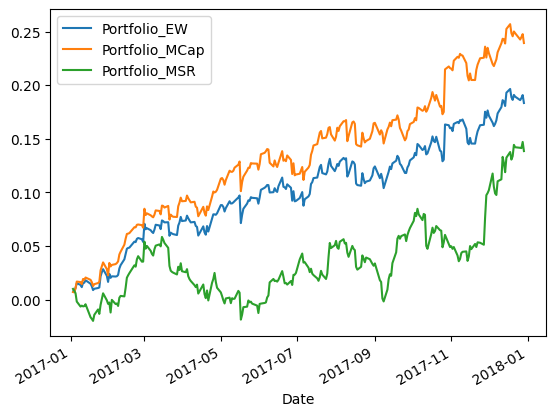

In [37]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)
# Recalcualte the portfolio returns and Mcap returns
#StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
#StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

**Intepretion**: You just optimized your first portfolio - but past performance does not guarantee future results. Returns are harder to predict, making the MSR unstable.

#### - The GMV portfolio
The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

<AxesSubplot: xlabel='Date'>

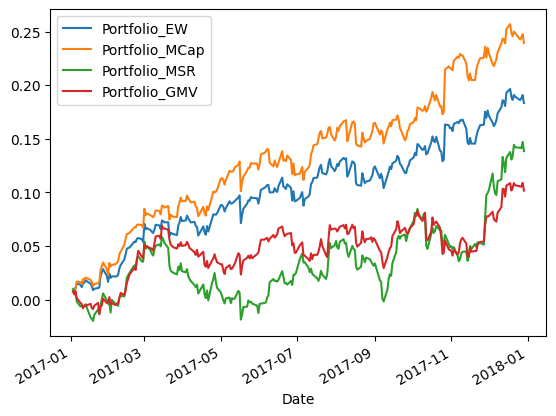

In [38]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

**Intepretion**: The GMV portfolio tends to be the most stable optimization over time, but of course you can expect a lower volatility portfolio to have lower return than the benchmark market cap weighting method.

## 3. Factor Investing

In [39]:
# Read in the csv file and parse dates 
fpath_csv4 = './datasets/FamaFrenchFactors.csv'
FamaFrenchData = pd.read_csv(fpath_csv4)

# Print only the first five rows of StockPrices
print(FamaFrenchData.head())


         Date  Portfolio  Market_Excess     SMB     HML     RMW     CMA   RF
0  2013-01-03  -0.005066        -0.0014  0.0014  0.0004  0.0020  0.0023  0.0
1  2013-01-04   0.004024         0.0055  0.0019  0.0043 -0.0037  0.0027  0.0
2  2013-01-07   0.004421        -0.0031 -0.0009 -0.0037 -0.0013 -0.0012  0.0
3  2013-01-08  -0.004659        -0.0027  0.0004 -0.0007 -0.0012  0.0009  0.0
4  2013-01-09   0.004636         0.0034  0.0024 -0.0041 -0.0007 -0.0015  0.0


### Excess returns
- In order to perform a robust analysis on your portfolio returns, you must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the Excess Portfolio Return.
- In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.
- The FamaFrenchData DataFrame is available in your workspace and contains the proper data for this exercise.

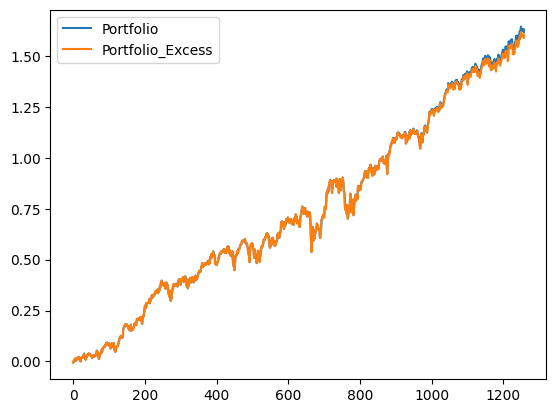

In [40]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

**Intepretion**: Notice how the excess return is only slightly less? That's because the risk free rate has been so low!

### Calculating beta using co-variance
- **Beta** is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.

- Historical beta can be estimated in a number of ways. In this exercise, you will use the following simple formula involving co-variance and variance to a benchmark market portfolio:

In [41]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

5.726126338154964e-05
5.880335088211895e-05
0.9737755165745455


**Intepretion**: The portfolio beta is 0.9738. You can think of market beta as a measure of your exposure to the broad stock market. For every 1.0% rise (or fall) in the market, you can expect your portfolio to rise (fall) roughly 0.97%.

## Calculating beta with CAPM (Capital Asset Pricing Model)
Your portfolio beta is once again 0.9738. The adjusted r-squared is 0.7943. A high adjusted r-squared (close to 1) means that the majority of your portfolio's movements can be explained by the factors in your model.

In [46]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(f'The r-square adjusted of the model is {CAPM_fit.rsquared_adj}')

# Extract the beta
regression_beta = CAPM_fit.params["Market_Excess"]
print(f'THe beta value is {regression_beta}')

The r-square adjusted of the model is 0.7942627160017839
THe beta value is 0.973775516574546


### The Fama French 3-factor model
The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns:
The Fama-French 3-Factor Model is a financial model that aims to explain the excess return of a portfolio or stock by considering three common risk factors. The formula for the Fama-French 3-Factor Model is as follows:

\[ R_i - R_f = \alpha_i + \beta_{i,Mkt}(R_{Mkt} - R_f) + \beta_{i,SMB}SMB + \beta_{i,HML}HML + \epsilon_i \]

Where:
- \( R_i \) is the return of the portfolio or stock.
- \( R_f \) is the risk-free rate.
- \( \alpha_i \) is the intercept, representing the abnormal return not explained by the three factors.
- \( \beta_{i,Mkt} \) is the sensitivity of the portfolio or stock to the market factor (Mkt).
- \( R_{Mkt} \) is the return of the market portfolio.
- \( \beta_{i,SMB} \) is the sensitivity of the portfolio or stock to the size factor (SMB), representing the return difference between small and large-cap stocks.
- \( SMB \) is the return of a portfolio of small stocks minus the return of a portfolio of big stocks.
- \( \beta_{i,HML} \) is the sensitivity of the portfolio or stock to the value factor (HML), representing the return difference between value and growth stocks.
- \( HML \) is the return of a portfolio of high book-to-market ratio stocks minus the return of a portfolio of low book-to-market ratio stocks.
- \( \epsilon_i \) is the error term.



This model suggests that the excess return of a portfolio can be explained by exposure to the market, size, and value factors. The coefficients \(\beta_{i,Mkt}\), \(\beta_{i,SMB}\), and \(\beta_{i,HML}\) represent the factor loadings or sensitivities of the portfolio or stock to each factor.

It's important to note that the Fama-French 3-Factor Model is an extension of the Capital Asset Pricing Model (CAPM) and provides a more nuanced approach by considering additional factors beyond the market risk. This model is widely used in asset pricing and portfolio management to assess the performance and risk of investment strategies.

In [48]:
# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(f' The R-square adjusted value of the model is: {regression_adj_rsq}')

 The R-square adjusted value of the model is: 0.8193910088585152


#### Intepretion:
The Fama-French 3 factor model fit well, raising the adjusted r-squared from 0.7943 to 0.8194, meaning that the model explains more of your portfolio variance. But there's still room for improvement...

# p-values and coefficients
You can use the `.pvalues `attribute on a fitted smf.ols regression model to retrieve the p-values for each coefficient.
Normally, p-values less than 0.05 are considered statistically significant.
Coefficients can be extracted from the fitted regression object using the .params attribute.
In this example, a statistically significant negative SMB ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.


In [49]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192643  and is  significant


#### Intepretion: 
The portfolio has a statistically significant negative exposure (-0.2621) to small-cap stocks - in other words - positive exposure to large caps!

#### Economic intuition in factor modeling
- Finance is all about **risk** and **return**. Higher risk tends to lead to higher returns over time, and lower risk portfolios tend to lead to lower returns over time.
- In the **Fama-French factor model**:
    - The HML factor is constructed by calculating the return of growth stocks, or stocks with high valuations, versus the return of value stocks.
    - The SMB factor is constructed by calculating the return of small-cap stocks, or stocks with small market capitalizations, versus the return of large-cap stocks.
 - **What should we expect?** Historically correct! Since 1982, value stocks have outperformed growth stocks in the majority of cases, and the tide often shifts during times of crisis and during bubbles such as the dot-com bubble during the late 1990's and early 2000's.

### The efficient market and alpha
- The alpha left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.
- There are two general schools of thought as to why:
    - The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the `Efficient Market Hypothesis`.
    - There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

In [50]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params["Intercept"]
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = (1+portfolio_alpha)**252 -1
print(portfolio_alpha_annualized)

0.0001832666520318303
0.04726181730280854


#### Intepretion: 
The annualized portfolio alpha is 4.73% -- Efficient markets beware!

### The 5-factor model
In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:
    - **RMW**: Profitability
    - **CMA**: Investment
- The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.



In [51]:
# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA ', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793
